# 캐글러를 대상으로 한 설문조사


> 참고자료: https://www.kaggle.com/kaggle/kaggle-survey-2017

*   설문기간: 2017.08.07 ~ 2017.08.25
*   평균 응답 시간: 16.4분
*   특정국가 또는 지역에서 응답자가 50명 미만인 경우 익명을 위해 그룹을 '기타 그룹으로 그룹화'
*   설문 조사 시스템에 신고된 응답자를 스팸으로 분류하거나 취업 상태에 관한 질문에 응답하지 않은 자는 제외
*   대부분의 응답자는 이메일 목록, 토론 포럼 및 소셜 미디어 캐글 채널을 통해 설문을 얻게 함
*   급여데이터는 일부 통화에 대해서만 받고 해당되는 통화에 기준하여 작성하도록 함
*   미국 달러로 급여를 계산할 수 있도록 USD로 환산한 csv파일을 제공함
*   질문은 선택적이고 모든 질문이 모든 응답자에게 보여지는 것은 아님
*   취업을 한 사람과 학생을 나누어 다른 질문을 함
*   응답자으이 신원을 보호하기 위해서 주관식과 객관식을 파일로 분리하고 객관식과 자유형식 응답을 맞추기 위한 키를 제공하지 않음
*   주관식 응답은 같은 행에 나타나는 응답이 반드시 동일한 설문 조사자가 제공하지 않도록 열 단위로 무작위 지정

# 데이터 파일
5개의 파일을 제공

*   schema.csv: 설문 스키마가 있는 CSV파일이다. 이 스키마에는 multipleChoiceResponses.cvs 및 freeformResponses.csv의 각 열 이름에 해당하는 질문이 포함되어 있다.
*   multipleChoiceResponses.csv: 객관식 및 순위 질문에 대한 응답자의 답변, 각 행이 한 응답자의 응답
*   freeformResponses.csv: 캐글의 설문 조사 질문에 대한 응답자의 주관식 답변이다. 임의로 지정되어 각 행이 같은 응답자를 나타내지 않음
*   conversionRates.csv: R패키지 "quantmod"에서 2017.09.14에 엑세스한 통화 변환율(USD)
*   RespondentTypeREADME.txt: schema.csv파일의 "Asked"열에 응답을 디코딩하는 스키마이다.
















In [0]:
# 그래프를 그리기 위해서
%matplotlib inline

import pandas as pd
import numpy as np

from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [154]:
# 질문에 대한 데이터 불러오기
question = pd.read_csv('schema.csv')
question.shape

(290, 3)

In [155]:
# 상위 5개 찍어보기
question.head()

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All


In [156]:
# 하위 5개 찍어보기
question.tail()

,Column,Question,Asked
285,JobFactorRemote,How are you assessing potential job opportunit...,Learners
286,JobFactorIndustry,How are you assessing potential job opportunit...,Learners
287,JobFactorLeaderReputation,How are you assessing potential job opportunit...,Learners
288,JobFactorDiversity,How are you assessing potential job opportunit...,Learners
289,JobFactorPublishingOpportunity,How are you assessing potential job opportunit...,Learners


In [157]:
# 판다스로 선다형 객관식 문제에 대한 응답을 가져옴, 파일 형식을 지정해줌
mcq = pd.read_csv('multipleChoiceResponses.csv',  encoding = "ISO-8859-1", low_memory = False)
mcq.shape

(16716, 228)

In [158]:
mcq.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [159]:
mcq.tail()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,PublicDatasetsSelect,LearningPlatformSelect,LearningPlatformUsefulnessArxiv,LearningPlatformUsefulnessBlogs,LearningPlatformUsefulnessCollege,LearningPlatformUsefulnessCompany,LearningPlatformUsefulnessConferences,LearningPlatformUsefulnessFriends,LearningPlatformUsefulnessKaggle,LearningPlatformUsefulnessNewsletters,LearningPlatformUsefulnessCommunities,LearningPlatformUsefulnessDocumentation,LearningPlatformUsefulnessCourses,LearningPlatformUsefulnessProjects,LearningPlatformUsefulnessPodcasts,LearningPlatformUsefulnessSO,LearningPlatformUsefulnessTextbook,LearningPlatformUsefulnessTradeBook,LearningPlatformUsefulnessTutoring,LearningPlatformUsefulnessYouTube,BlogsPodcastsNewslettersSelect,LearningDataScienceTime,JobSkillImportanceBigData,JobSkillImportanceDegree,JobSkillImportanceStats,JobSkillImportanceEnterpriseTools,...,WorkChallengeFrequencyITCoordination,WorkChallengeFrequencyHiringFunds,WorkChallengeFrequencyPrivacy,WorkChallengeFrequencyScaling,WorkChallengeFrequencyEnvironments,WorkChallengeFrequencyClarity,WorkChallengeFrequencyDataAccess,WorkChallengeFrequencyOtherSelect,WorkDataVisualizations,WorkInternalVsExternalTools,WorkMLTeamSeatSelect,WorkDatasets,WorkDatasetsChallenge,WorkDataStorage,WorkDataSharing,WorkDataSourcing,WorkCodeSharing,RemoteWork,CompensationAmount,CompensationCurrency,SalaryChange,JobSatisfaction,JobSearchResource,JobHuntTime,JobFactorLearning,JobFactorSalary,JobFactorOffice,JobFactorLanguages,JobFactorCommute,JobFactorManagement,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
16711,Female,Other,24.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16712,Male,Indonesia,25.0,Employed full-time,NaN,NaN,Yes,NaN,Programmer,Fine,Employed by a company that doesn't perform adv...,Jupyter notebooks,Bayesian Methods,Python,Dataset aggregator/platform (i.e. Socrata/Kagg...,"Kaggle,Non-Kaggle online communities,Online co...",NaN,NaN,NaN,NaN,NaN,NaN,Somewhat useful,NaN,Somewhat useful,NaN,Somewhat useful,NaN,NaN,Somewhat useful,NaN,NaN,NaN,Somewhat useful,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Sometimes,NaN,NaN,NaN,NaN,NaN,NaN,Less than 10% of projects,More internal than external,IT Department,NaN,NaN,"Key-value store (e.g. Redis/Riak),Row-oriented...","Email,Share Drive/SharePoint",NaN,Git,Rarely,NaN,IDR,I do not want to share information about my sa...,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16713,Female,Taiwan,25.0,Employed part-time,NaN,NaN,No,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16714,Female,Singapore,16.0,I prefer not to say,Yes,"Yes, but data science is a small part of what ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16715,Male,Japan,27.0,Employed full-time,NaN,NaN,No,Yes,Programmer,Fine,Employed by professional services/consulting firm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [160]:
mcq.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,PublicDatasetsSelect,LearningPlatformSelect,LearningPlatformUsefulnessArxiv,LearningPlatformUsefulnessBlogs,LearningPlatformUsefulnessCollege,LearningPlatformUsefulnessCompany,LearningPlatformUsefulnessConferences,LearningPlatformUsefulnessFriends,LearningPlatformUsefulnessKaggle,LearningPlatformUsefulnessNewsletters,LearningPlatformUsefulnessCommunities,LearningPlatformUsefulnessDocumentation,LearningPlatformUsefulnessCourses,LearningPlatformUsefulnessProjects,LearningPlatformUsefulnessPodcasts,LearningPlatformUsefulnessSO,LearningPlatformUsefulnessTextbook,LearningPlatformUsefulnessTradeBook,LearningPlatformUsefulnessTutoring,LearningPlatformUsefulnessYouTube,BlogsPodcastsNewslettersSelect,LearningDataScienceTime,JobSkillImportanceBigData,JobSkillImportanceDegree,JobSkillImportanceStats,JobSkillImportanceEnterpriseTools,...,WorkChallengeFrequencyITCoordination,WorkChallengeFrequencyHiringFunds,WorkChallengeFrequencyPrivacy,WorkChallengeFrequencyScaling,WorkChallengeFrequencyEnvironments,WorkChallengeFrequencyClarity,WorkChallengeFrequencyDataAccess,WorkChallengeFrequencyOtherSelect,WorkDataVisualizations,WorkInternalVsExternalTools,WorkMLTeamSeatSelect,WorkDatasets,WorkDatasetsChallenge,WorkDataStorage,WorkDataSharing,WorkDataSourcing,WorkCodeSharing,RemoteWork,CompensationAmount,CompensationCurrency,SalaryChange,JobSatisfaction,JobSearchResource,JobHuntTime,JobFactorLearning,JobFactorSalary,JobFactorOffice,JobFactorLanguages,JobFactorCommute,JobFactorManagement,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,Employed by a company that doesn't perform adv...,SAS Base,Random Forests,F#,Dataset aggregator/platform (i.e. Socrata/Kagg...,"College/University,Conferences,Podcasts,Trade ...",NaN,NaN,NaN,NaN,Very useful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very useful,NaN,NaN,Somewhat useful,NaN,NaN,"Becoming a Data Scientist Podcast,Data Machina...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Often,Most of the time,NaN,NaN,NaN,NaN,26-50% of projects,Do not know,Standalone Team,NaN,NaN,Document-oriented (e.g. MongoDB/Elasticsearch)...,"Company Developed Platform,I don't typically s...",NaN,"Mercurial,Subversion,Other",Always,NaN,NaN,I am not currently employed,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,Random Forests,Python,Dataset aggregator/platform (i.e. Socrata/Kagg...,Kaggle,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat useful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Becoming a Data Scientist Podcast,Siraj Raval ...",1-2 years,NaN,Nice to have,Unnecessary,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Amazon Web services,Deep learning,R,Dataset aggregator/platform (i.e. Socrata/Kagg...,"Arxiv,College/University,Kaggle,Online courses...",Very useful,NaN,Somewhat useful,NaN,NaN,NaN,Somewhat useful,NaN,NaN,NaN,Very useful,NaN,NaN,NaN,NaN,NaN,NaN,Very useful,"FastML Blog,No Free Hunch Blog,Talking Machine...",1-2 years,Necessary,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Asking friends, family members, or former coll...",1-2,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Impor

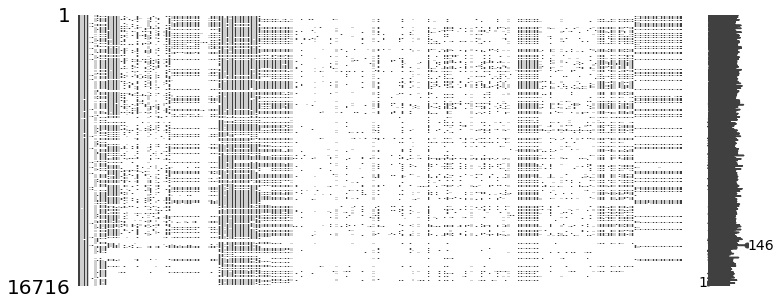

In [161]:
# missingno는 NaN 데이터들에 대해 시각화를 해준다. NaN 데이터의 컬럼이 많아 아래 그래프만으로는 내용을 파악하기 어렵다
import missingno as msno
msno.matrix(mcq, figsize = (12, 5))

# 16716 명의 데이터와 228개의 선다형 객관식 문제와 62개의 주관식 질문에 대한 응합이다. 총 290개의 질문이 응답하지 않은 질문이 많다.

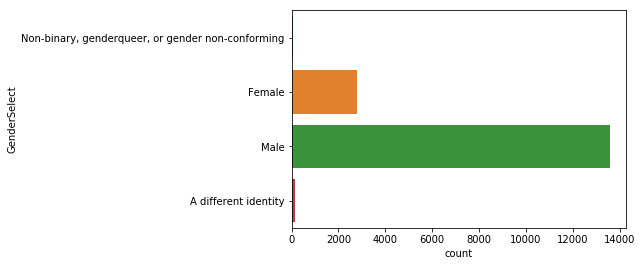

In [162]:
# 설문 통계, 성별
sns.countplot(y = 'GenderSelect', data = mcq)

# 여성보다 남성의 비율이 많다.

In [163]:
con_df = pd.DataFrame(mcq['Country'].value_counts())
con_df

,Country
United States,4197
India,2704
Other,1023
Russia,578
United Kingdom,535
People 's Republic of China,471
Brazil,465
Germany,460
France,442
Canada,440


In [164]:
# 국가별 응답수
# country 컬럼을 인덱스로 지정해준다.
con_df['국가'] = con_df.index

# 컬럼의 순서대로 응답 수, 국가로 컬럼명을 지정해 준다.
con_df.columns = ['응답 수', '국가']

# 인덱스 컬럼을 삭제하고 순위를 알기위해 reste_index()를 해준다.
con_df = con_df.reset_index().drop('index', axis = 1)

# 우리나라는 17위이고 전체 52개국에서 참여했지만 20위까지만 본다.
con_df.head(20)

,응답 수,국가
0,4197,United States
1,2704,India
2,1023,Other
3,578,Russia
4,535,United Kingdom
5,471,People 's Republic of China
6,465,Brazil
7,460,Germany
8,442,France
9,440,Canada


In [165]:
# 연령에 대한 정보를 본다.
mcq["Age"].describe()

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

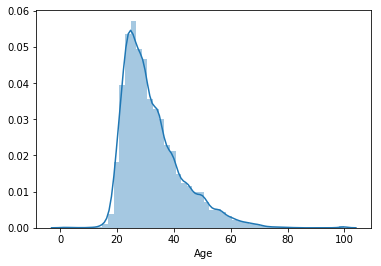

In [166]:
# 0세이상으로 응답자에 한에서 찍어봄, 응답자가 대부분 연령층이 어리고, 20대부터 급격히 늘어나며 30대가 가장 많다는 것을 그림과 같이 알 수 있다. 평균나이는 32세이다.
sns.distplot(mcq[mcq['Age'] > 0]['Age'])

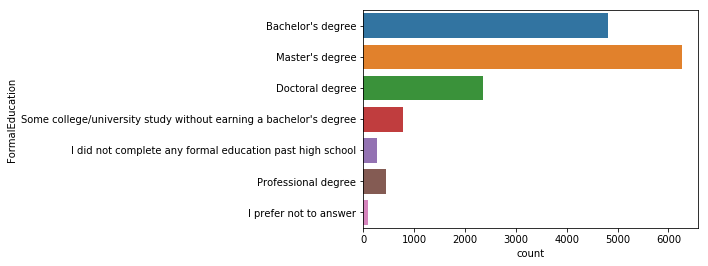

In [167]:
# 학력
sns.countplot(y = 'FormalEducation', data = mcq)

# 학사 학위를 가진 사람보다 석사학위를 가진사람이 더 많았음

In [168]:
# 전공
# value_counts를 통해 그룹화된 데이터의 카운트 값을 보여줌
# normalize = True 옵션을 사용하여 해당 데이터가 전체 데이터에서 어느 정도의 비율을 차지하는지 알 수 있음
mcq_major_count = pd.DataFrame(mcq['MajorSelect'].value_counts())

mcq_major_percent = pd.DataFrame(mcq['MajorSelect'].value_counts(normalize = True))

# merge는 하나의 데이블에 보여지게 할 수 있음
mcq_major_df = mcq_major_count.merge(mcq_major_percent, left_index = True, right_index = True)

mcq_major_df.columns = ['응답 수', '비율']
mcq_major_df

,응답 수,비율
Computer Science,4397,0.331074
Mathematics or statistics,2220,0.167156
Engineering (non-computer focused),1339,0.100821
Electrical Engineering,1303,0.098110
Other,848,0.063851
Physics,830,0.062495
"Information technology, networking, or system administration",693,0.052180
A social science,531,0.039982
Biology,274,0.020631
Management information systems,237,0.017845


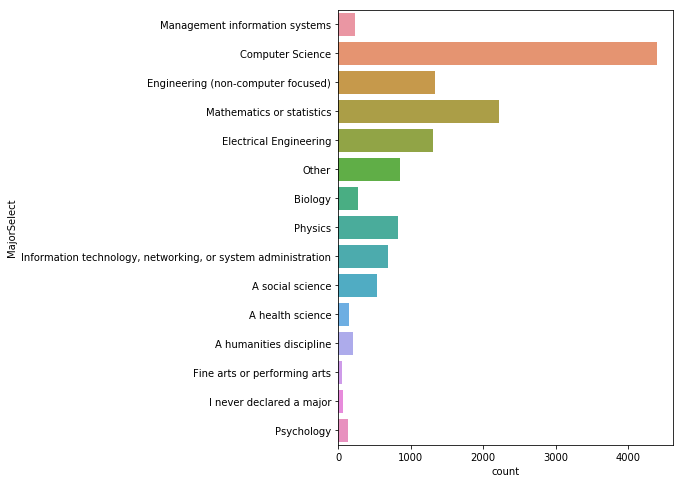

In [169]:
# 재학중인 사람들의 전공 현황 시각화하기
plt.figure(figsize = (6, 8))
sns.countplot(y = 'MajorSelect', data = mcq)

# 컴퓨터 사이언스를 전공한 사람이 45퍼센트이다.

In [170]:
# 취업 여부: 재직 중인 상태인지, 학생인지 아까 전공관련하여 데이블 만든 것처럼 merge는 데이블을 합지는 역할
mcq_es_count = pd.DataFrame(mcq['EmploymentStatus'].value_counts())

mcq_es_percent = pd.DataFrame(mcq['EmploymentStatus'].value_counts(normalize = True))

mcq_es_df = mcq_es_count.merge(mcq_es_percent, left_index = True, right_index = True)

mcq_es_df.columns = ['응답 수', '비율']
mcq_es_df

,응답 수,비율
Employed full-time,10897,0.651890
"Not employed, but looking for work",2110,0.126226
"Independent contractor, freelancer, or self-employed",1330,0.079564
"Not employed, and not looking for work",924,0.055276
Employed part-time,917,0.054858
I prefer not to say,420,0.025126
Retired,118,0.007059


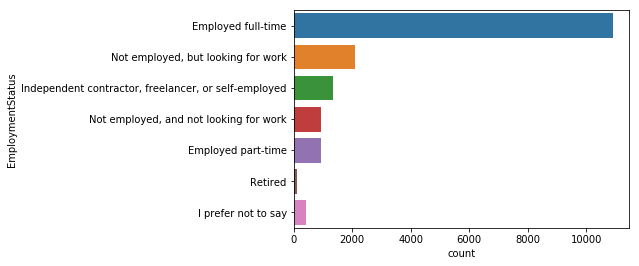

In [171]:
# 위의 결과를 시각화하기
sns.countplot(y = 'EmploymentStatus', data = mcq)

# 응답자의 63%가 풀타임으로 일하고 있으며, 구직자는 0.14%이다.

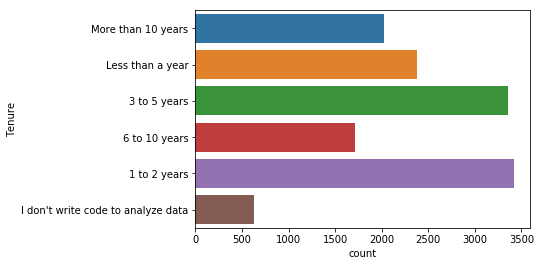

In [172]:
# 프로그래밍 경험: Tenure의 항목은 데이터사이언스 분야에서 코딩 경험이 얼마나 되는지에 대한 질문이다. 대부분이 5년 미만이며, 특히 1-2년의 경험을 가진 사람들이 대부분이다.
sns.countplot(y = 'Tenure', data = mcq)

The number of interviewe in Korea:194


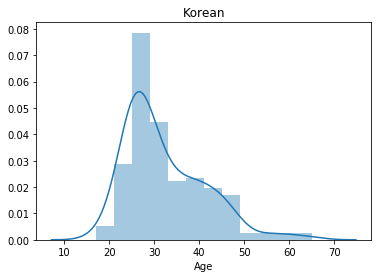

In [173]:
# 그렇다면 우리나라는 어떤지 한번 살펴보자
korea_ex = mcq.loc[(mcq['Country'] == 'South Korea')]
print('The number of interviewe in Korea:' + str(korea_ex.shape[0]))

sns.distplot(korea_ex['Age'].dropna())

plt.title('Korean')
plt.show()

In [174]:
# 우리나라 성별별
pd.DataFrame(korea_ex['GenderSelect'].value_counts())

,GenderSelect
Male,156
Female,37
A different identity,1


Text(0.5, 1.0, 'Korean')

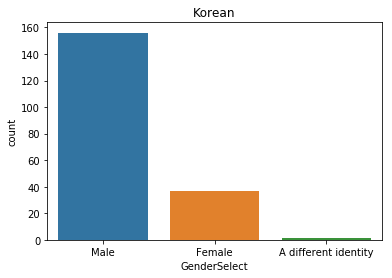

In [175]:
sns.countplot(x = 'GenderSelect', data = korea_ex)
plt.title('Korean')

Text(0.5, 1.0, 'Korean Male')

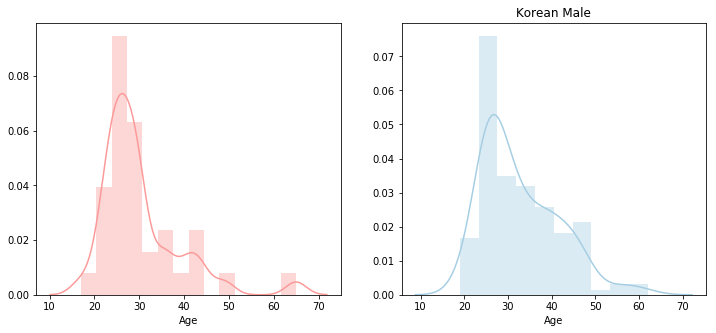

In [176]:
# 성별을 연령대별로 시각화해보기,subplots를 사용하면 여러개를 그릴 수 있다. ax1, ax2로 지정하면 됨
figure, (ax1, ax2) = plt.subplots(ncols = 2)
figure.set_size_inches(12, 5)
sns.distplot(korea_ex['Age'].loc[korea_ex['GenderSelect'] == 'Female'].dropna(),
            norm_hist = False, color = sns.color_palette("Paired")[4], ax = ax1)
plt.title('Korean Female')

sns.distplot(korea_ex['Age'].loc[korea_ex['GenderSelect'] == 'Male'].dropna(),
            norm_hist = False, color = sns.color_palette("Paired")[0], ax = ax2)
plt.title('Korean Male')

# 왼쪽은 여자, 오른쪽은 남자로 대부분 20~30대가 많다.

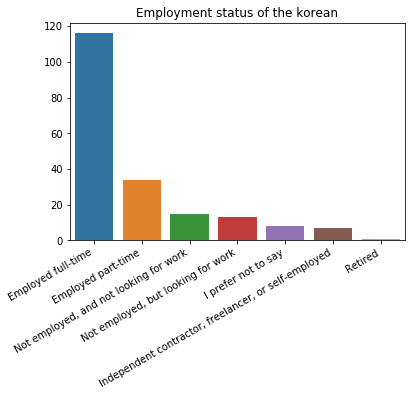

In [177]:
# 우리나라 직업별
sns.barplot(x = korea_ex['EmploymentStatus'].unique(), y = korea_ex['EmploymentStatus'].value_counts())
plt.xticks(rotation = 30, ha = 'right') # 옵션이다.
plt.title('Employment status of the korean')
plt.ylabel('')
plt.show()

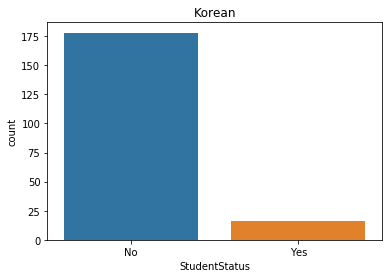

In [178]:
# 학생인지 아닌지에 대한 그래프
korea_ex['StudentStatus'] = korea_ex['StudentStatus'].fillna('No')
sns.countplot(x = 'StudentStatus', data = korea_ex)
plt.title('Korean')
plt.show()

In [179]:
full_time = mcq.loc[(mcq['EmploymentStatus'] == 'Employed full-time')]
print(full_time.shape)

looking_for_job = mcq.loc[(mcq['EmploymentStatus'] == 'Not employed, but looking for work')]
print(looking_for_job.shape)

# full_time인 응답자가 10897명이고, looking_for_job인 응답자가 2110명이다.

(10897, 228)
(2110, 228)


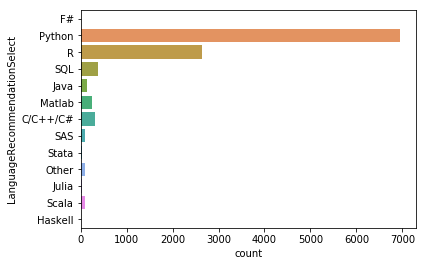

In [180]:
# 자주 묻는 질문 FAQ: 초보자들이 묻는 가장 일반적인 질문에 대한 답을 시각화 해보자.
# Q1. python과 R중 어떤 언어를 배워야할까요?
sns.countplot(y = 'LanguageRecommendationSelect', data = mcq)

# 파이썬을 선호하기 있는 것으로 보여진다.

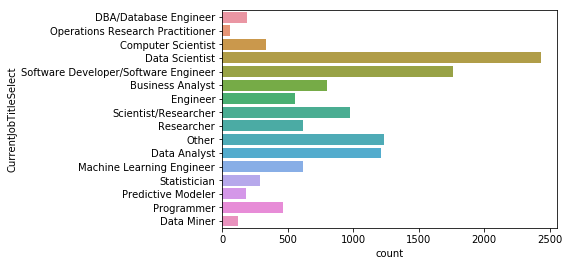

In [181]:
# 현재 하고 있는 일은 어떤 일인지?
sns.countplot(y = mcq['CurrentJobTitleSelect'])

In [182]:
# 현재하고 있는 일에 대한 전체 응답수  11830명이다.
mcq[mcq['CurrentJobTitleSelect'].notnull()]['CurrentJobTitleSelect'].shape

(11830,)

(7158, 228)


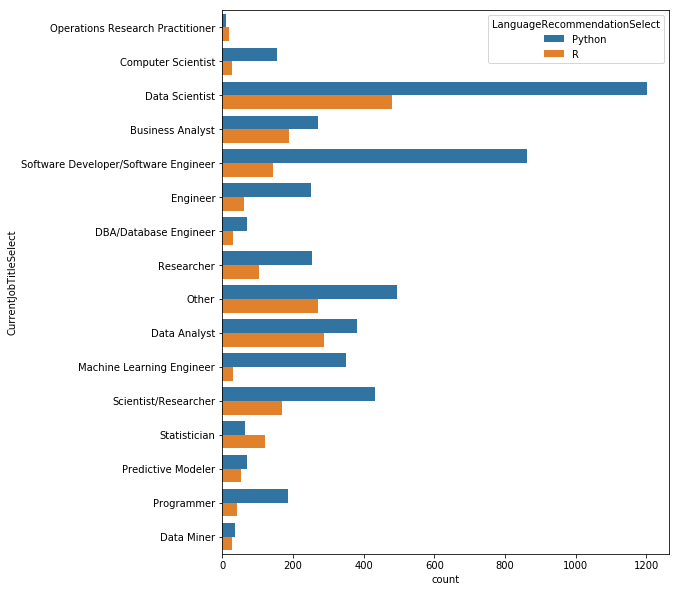

In [183]:
# 현재 하고 있는 일에 대한 응답을 한 사람 중 python과 R을 사용하는 사람
# 응답자들이 실제 업무에서 어떤 언어를 주로 사용하는지 볼 수 있다.

data = mcq[(mcq['CurrentJobTitleSelect'].notnull()) & ((mcq['LanguageRecommendationSelect'] == 'Python') |
                                                       (mcq['LanguageRecommendationSelect'] == 'R'))]
print(data.shape)

plt.figure(figsize = (8, 10))
sns.countplot(y = 'CurrentJobTitleSelect', hue = 'LanguageRecommendationSelect', data = data)

# 대체적으로 파이썬을 선호하는데, 통계학자는 R을 선호한다. 응답자는 총 7158명이다.

In [184]:
# Q2. 데이터 사이언스 분야에서 앞으로 크게 주목받을 것은 무엇일까요? : 관련 분야의 종사자가 아니더라도 빅데이터, 딥러닝, 뉴럴네트워크 같은 용어에 대해 알고 있다.
# 응답자들이 내년에 가장 흥미로운 기술이 될 것이라 응답한 것이다.
# 데이터사이언스 툴(도구)

mcq_ml_tool_count = pd.DataFrame(mcq['MLToolNextYearSelect'].value_counts())

mcq_ml_tool_percent = pd.DataFrame(mcq['MLToolNextYearSelect'].value_counts(normalize = True))

mcq_ml_tool_df = mcq_ml_tool_count.merge(mcq_ml_tool_percent, left_index = True, right_index = True).head(20)

mcq_ml_tool_df.columns = ['응답 수', '비율']
mcq_ml_tool_df

,응답 수,비율
TensorFlow,2621,0.238316
Python,1713,0.155756
R,910,0.082742
Spark / MLlib,755,0.068649
Hadoop/Hive/Pig,417,0.037916
Other,407,0.037007
Amazon Machine Learning,392,0.035643
Jupyter notebooks,358,0.032551
I don't plan on learning a new tool/technology,341,0.031006
Google Cloud Compute,296,0.026914


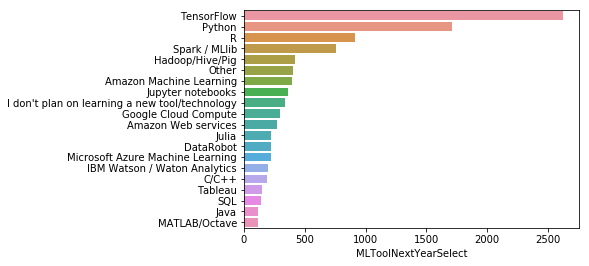

In [185]:
data_mlt = mcq['MLToolNextYearSelect'].value_counts().head(20)
sns.barplot(y = data_mlt.index, x = data_mlt)

# 구글의 딥러닝 프레임워크인 텐서플로우가 28퍼센트로 가장 많은 관심을 받을 것이라 응답했다. 그리고 파이썬이 17퍼센트, R은 8퍼센트로 따르고 있다.

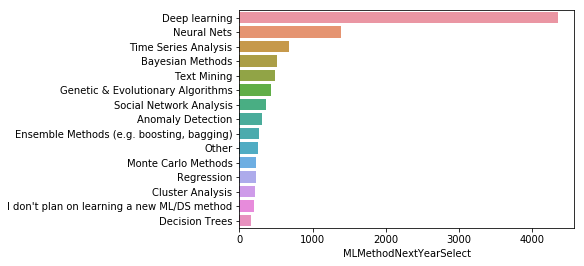

In [186]:
# 데이터사이언스 방법(Data Science Methods)
data_mlm = mcq['MLMethodNextYearSelect'].value_counts().head(15)
sns.barplot(y = data_mlm.index, x = data_mlm)

# 딥러닝과 뉴럴넷이 인기가 있을 것이고, 시계열 분석, 베이지안, 텍스트 마이닝 등의 내용이 있다. 부스팅, 배깅같은 메소드도 볼 수 있다.

In [0]:
# Q3. 어디에서 데이터 사이언스를 배워야 할까요?
#data_lpf = mcq['LearningPlatformSelect'].astype('str').apply(lambda x: x.split(','))
mcq['LearningPlatformSelect'] = mcq['LearningPlatformSelect'].astype('str').apply(lambda x: x.split(','))
s = mcq.apply(lambda x: pd.Series(x['LearningPlatformSelect']), axis=1).stack().reset_index(level=1, drop=True)
s.name = 'platform'

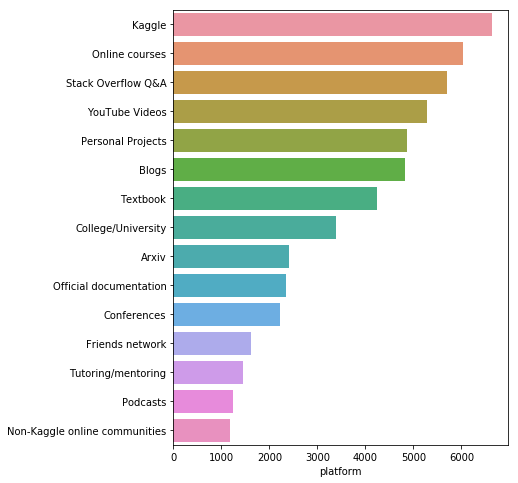

In [188]:
# nan를 제외하고 15개만 뽑음
plt.figure(figsize=(6,8))
data_lpf = s[s != 'nan'].value_counts().head(15)
sns.barplot(y=data_lpf.index, x=data_lpf)

# kaggle이 가장 인기있는 학습 플랫폼, 편향이 있을 수도 있다는 점, 유튜브 및 stackoverflow 학교나 학위보다 우수 플랫폼이다.

In [189]:
# 설문내용은 누구에게 가장 많이 물어봤는가 살펴보자
qc = question.loc[question['Column'].str.contains('LearningCategory')]
print(qc.shape)
qc

(7, 3)


,Column,Question,Asked
91,LearningCategorySelftTaught,What percentage of your current machine learni...,All
92,LearningCategoryOnlineCourses,What percentage of your current machine learni...,All
93,LearningCategoryWork,What percentage of your current machine learni...,All
94,LearningCategoryUniversity,What percentage of your current machine learni...,All
95,LearningCategoryKaggle,What percentage of your current machine learni...,All
96,LearningCategoryOther,What percentage of your current machine learni...,All
97,LearningCategoryOtherFreeForm,What percentage of your current machine learni...,All


In [0]:
# 우수한 플랫폼들을 use_features에 모았음
use_features = [x for x in mcq.columns if x.find(
    'LearningPlatformUsefulness') != -1]

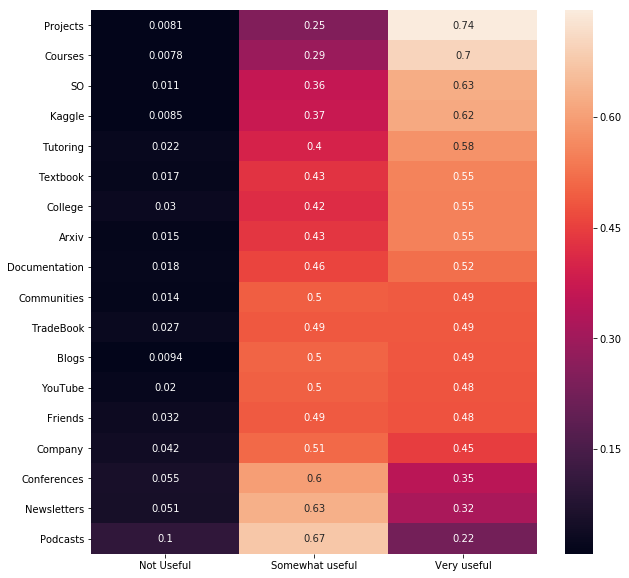

In [191]:
# 학습 플랫폼과 유용함에 대한 연관성을 살펴본다.
fdf = {}
for feature in use_features:
  a = mcq[feature].value_counts()
  a = a/a.sum()
  fdf[feature[len('LearningPlatformUsefulness'):]] = a

fdf = pd.DataFrame(fdf).transpose().sort_values('Very useful', ascending = False)

# 학습 플랫폼들이 얼마나 유용한지에 대한 상관관계를 그려보자
plt.figure(figsize = (10, 10))

# 가장 유용함 순으로 그려본다.
sns.heatmap(fdf.sort_values('Very useful', ascending = False), annot = True)

# 1에 가까울수록 유용함이 높다는 것을 의미한다. 

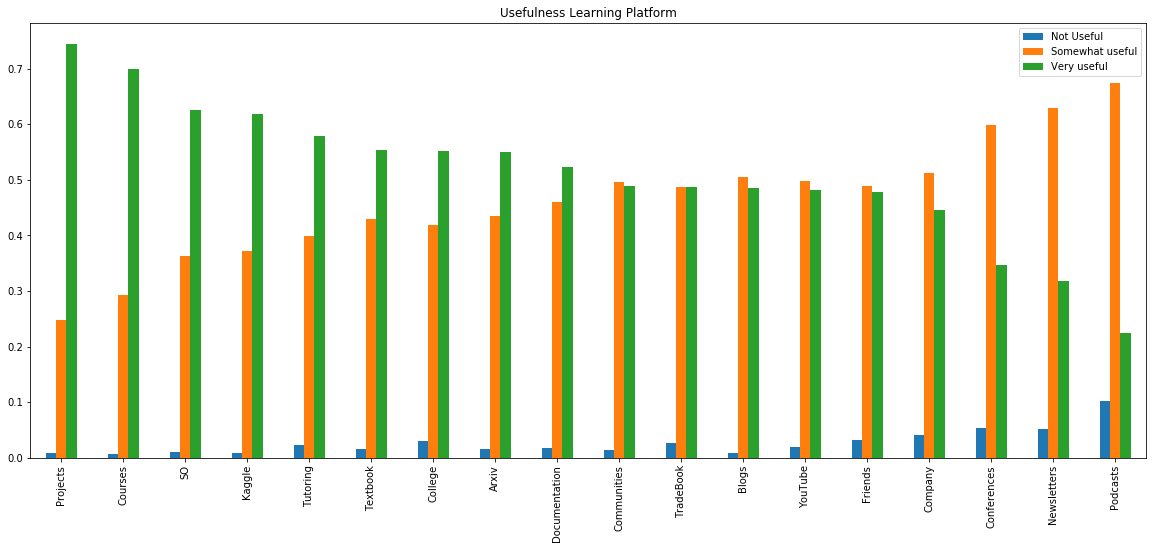

In [192]:
# 유용함이 정도를 각 플랫폼별로 그룹화하여 보자.
fdf.plot(kind = 'bar', figsize = (20, 8), title = "Usefulness Learning Platform")

# 실제로 프로젝트를 해보는 것에 대해 74퍼센트 응답자가 응답했고 매우 유용하다고 표시했다. SO는 stackvoerflow고 캐글, 수업, 책이 도움이 많이되는 편이다.

In [195]:
# 파이차트(원)를 구하기 위해서 cat_features에 LearningCategory를 모았다.
cat_features = [x for x in mcq.columns if x.find('LearningCategory') !=-1]
cat_features

['LearningCategorySelftTaught',
 'LearningCategoryOnlineCourses',
 'LearningCategoryWork',
 'LearningCategoryUniversity',
 'LearningCategoryKaggle',
 'LearningCategoryOther']

In [196]:
cdf = {}
for feature in cat_features:
    cdf[feature[len('LearningCategory'):]] = mcq[feature].mean()

# 평균 값을 구해와서 담아준다.
cdf = pd.Series(cdf)
cdf

SelftTaught      33.366771
OnlineCourses    27.375514
Work             15.217593
University       16.988607
Kaggle            5.531434
Other             1.795940
dtype: float64

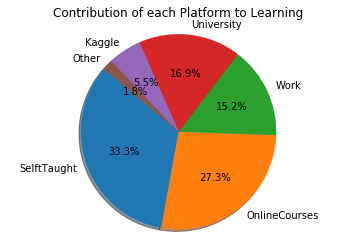

In [197]:
# 학습 플랫폼별로 도움이 되는 정도를 그려보자.

plt.pie(cdf, labels=cdf.index, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Contribution of each Platform to Learning")
plt.show()

# SelfTaught의 비율이 33.3퍼센트로 가장 많으며, OnlineCourses(27.3%)와 University(16.9%), work(15.2%), kaggle(5.5%)순으로 배웠다고 나온다.

In [199]:
# Q4. 데이터과학을 배우는데 있어서 높은 사양의 컴퓨터가 필요한가요?
# 설문내용과 누구에게 물어봤는이 확인해보자
qc_hwp = question.loc[question['Column'].str.contains('HardwarePersonalProjectsSelect')]
print(qc_hwp.shape)
qc_hwp

# Learners에게 질문하였음

(1, 3)


,Column,Question,Asked
74,HardwarePersonalProjectsSelect,Which computing hardware do you use for your p...,Learners


In [200]:
# HardwarePersonalProjectSelect는 4206명이 응답해주었음
mcq[mcq['HardwarePersonalProjectsSelect'].notnull()]['HardwarePersonalProjectsSelect'].shape

(4206,)

In [0]:
mcq['HardwarePersonalProjectsSelect'] = mcq['HardwarePersonalProjectsSelect'].astype('str').apply(lambda x: x.split(','))
s = mcq.apply(lambda x: pd.Series(x['HardwarePersonalProjectsSelect']), axis=1).stack().reset_index(level=1, drop=True)
s.name = 'hardware'

In [0]:
s = s[s != 'nan']

In [203]:
pd.DataFrame(s.value_counts())
# 맥북사용자가 가장 많았고, 탑과 함께 클라우드를 사용하는 사람들이 그 다음이고 적당한 GPU를 가진 게임용 노트북을 사용한다.

,hardware
Basic laptop (Macbook),2246
Laptop + Cloud service (AWS,669
Azure,669
GCE ...),669
Gaming Laptop (Laptop + CUDA capable GPU),641
Traditional Workstation,527
Laptop or Workstation and local IT supported servers,445
GPU accelerated Workstation,416
Workstation + Cloud service,174
Other,147


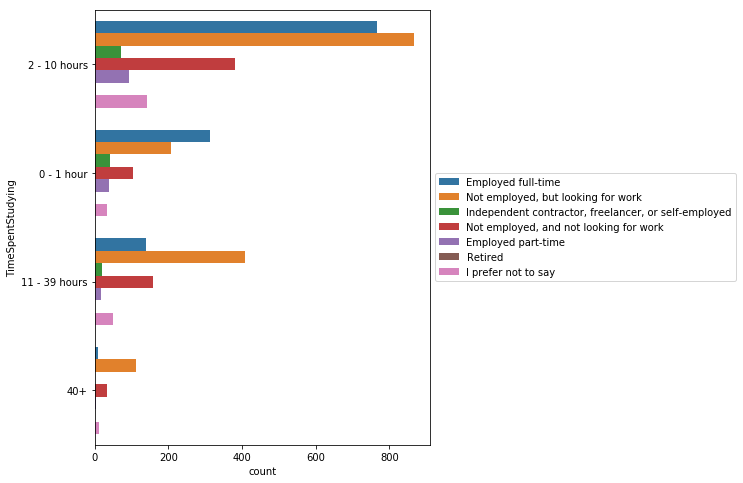

In [204]:
# Q5. 데이터 사이언스 공부에 얼마나 많은 시간을 투자하는가?
plt.figure(figsize=(6, 8))
sns.countplot(y='TimeSpentStudying', data=mcq, hue='EmploymentStatus').legend(loc='center left', bbox_to_anchor=(1, 0.5))

# 풀타임으로 일하는 사람들은 2~10시간 일하는 비율이 높으며, 풀타임으로 일하는 사람보다 일을 찾고 있는 사람들이 더 많은 시간을 공부하는 편이다.
# 하지만 응답자 중 대부분이 풀타임으로 일하고 있는 사람들이라는 것을 고려할 필요가 있다.

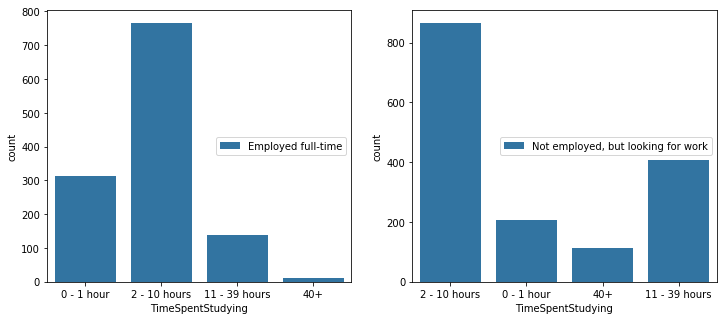

In [205]:
# 두개를 나누어 살펴보자.
figure, (ax1, ax2) = plt.subplots(ncols=2)

figure.set_size_inches(12,5)
sns.countplot(x='TimeSpentStudying', 
              data=full_time, 
              hue='EmploymentStatus', ax=ax1
             ).legend(loc='center right',
                      bbox_to_anchor=(1, 0.5))

sns.countplot(x='TimeSpentStudying', 
              data=looking_for_job, 
              hue='EmploymentStatus', ax=ax2
             ).legend(loc='center right',
                      bbox_to_anchor=(1, 0.5))

# 오른쪽은 Employed full-time이고 왼쪽은 Not employed, but looking for work이다.

In [206]:
# Q6. 블로그, 팟캐스트, 수업 기타 등등 추천할만한 것이 있는가?
# BlogsPodcastsNewslettersSelect를 ,(콤마)로 스플릿해서 다시 담아 주었다.
mcq['BlogsPodcastsNewslettersSelect'] = mcq['BlogsPodcastsNewslettersSelect'].astype('str').apply(lambda x: x.split(','))
mcq['BlogsPodcastsNewslettersSelect'].head()

# 한 행에 여러가지가 있기 때문에 이것을 분리해줘야 한다.

0    [Becoming a Data Scientist Podcast, Data Machi...
1    [Becoming a Data Scientist Podcast, Siraj Rava...
2    [FastML Blog, No Free Hunch Blog, Talking Mach...
3                                     [KDnuggets Blog]
4    [Data Machina Newsletter, Jack's Import AI New...
Name: BlogsPodcastsNewslettersSelect, dtype: object

In [207]:
# 한 항목당 하나의 로우(row)를 가지도록 처리함
s = mcq.apply(lambda x: pd.Series(x['BlogsPodcastsNewslettersSelect']), axis = 1).stack().reset_index(level = 1, drop = True)
s.name = 'platforms'
s.head()

0    Becoming a Data Scientist Podcast
0              Data Machina Newsletter
0             O'Reilly Data Newsletter
0         Partially Derivative Podcast
0           R Bloggers Blog Aggregator
Name: platforms, dtype: object

In [0]:
data_bp = s[s != 'nan'].value_counts().head(20)
# groupby해서 카운트 한 값의 상위 20개만 뽑아내기

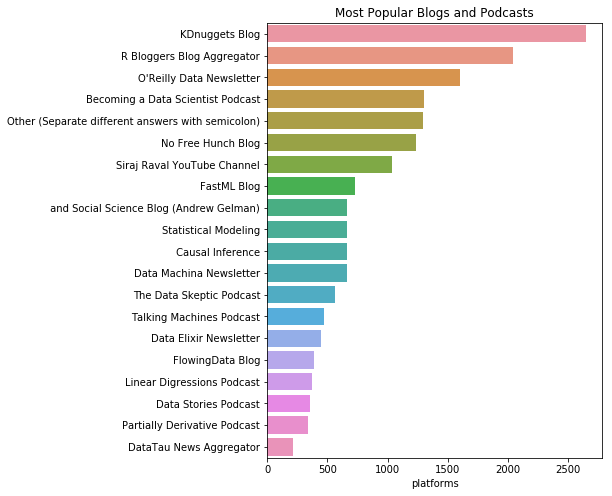

In [209]:
# 위의 값을 시각화하기
plt.figure(figsize = (6, 8))
plt.title("Most Popular Blogs and Podcasts")
sns.barplot(y = data_bp.index, x = data_bp)

KDNuggets Blog, R Bloggers Blog Aggregator가 유명하다는 튜표 결과를 받았음
데이터 사이언스가 되기라는 팟캐스트도 유명하다.

*   https://www.kdnuggets.com/


In [210]:
# 인기있는 코스 플랫폼 뽑아보기, 칼럼의 형태가 아님
mcq['CoursePlatformSelect'] = mcq['CoursePlatformSelect'].astype('str').apply(lambda x: x.split(','))

mcq['CoursePlatformSelect'].head()

0              [nan]
1              [nan]
2    [Coursera, edX]
3              [nan]
4              [nan]
Name: CoursePlatformSelect, dtype: object

In [211]:
t = mcq.apply(lambda x: pd.Series(x['CoursePlatformSelect']), axis = 1).stack().reset_index(level = 1, drop = True)
t.name = 'Courses'
t.head(20)

# 보는 바와 같이 중간에  nan(결측치)가 섞여 있다. 제거를 해줘어 나타내야 한다.

0          nan
1          nan
2     Coursera
2          edX
3          nan
4          nan
5          nan
6          nan
7     Coursera
8          nan
9          nan
10    Coursera
11         nan
12    Coursera
12    DataCamp
12         edX
13         nan
14         nan
15         nan
16         nan
Name: Courses, dtype: object

In [212]:
data_cp = t[t != 'nan'].value_counts()
data_cp

Coursera    1725
Udacity      805
edX          710
DataCamp     638
Other        356
Name: Courses, dtype: int64

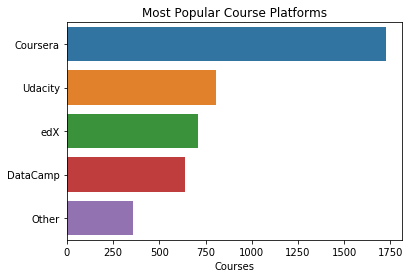

In [213]:
plt.title("Most Popular Course Platforms")
sns.barplot(y = data_cp.index, x = data_cp)

# courser, udacity, edx순으로 나타낼 수 있다.

In [214]:
# Q7. 데이터 사이언스 직무에서 가장 중요하다고 생각되는 스킬은 무엇인가요?
# JobSkillImportanceOther은 1,2,3으로 주어지는데 없에기 위해서

job_features = [x for x in mcq.columns if x.find('JobSkillImportance') !=-1
               and x.find('JobSkillImportanceOther') == -1]

job_features

['JobSkillImportanceBigData',
 'JobSkillImportanceDegree',
 'JobSkillImportanceStats',
 'JobSkillImportanceEnterpriseTools',
 'JobSkillImportancePython',
 'JobSkillImportanceR',
 'JobSkillImportanceSQL',
 'JobSkillImportanceKaggleRanking',
 'JobSkillImportanceMOOC',
 'JobSkillImportanceVisualizations']

In [215]:
# 위 항목들에 대해서 응답을 value_counts로 담아주었음
jdf = {}
for feature in job_features:
  a = mcq[feature].value_counts()
  a = a/a.sum()
  jdf[feature[len('JobSkillImportance'):]] = a # (''):의 의미는 'B'로 요약된 부분의 정확한 부분을 보이기 위해서 'BigData'로 쓰여진 구문이다.

jdf

{'BigData': Nice to have    0.574065
 Necessary       0.379929
 Unnecessary     0.046006
 Name: JobSkillImportanceBigData, dtype: float64,
 'Degree': Nice to have    0.598107
 Necessary       0.279867
 Unnecessary     0.122026
 Name: JobSkillImportanceDegree, dtype: float64,
 'EnterpriseTools': Nice to have    0.564970
 Unnecessary     0.290200
 Necessary       0.144829
 Name: JobSkillImportanceEnterpriseTools, dtype: float64,
 'KaggleRanking': Nice to have    0.677261
 Unnecessary     0.203876
 Necessary       0.118863
 Name: JobSkillImportanceKaggleRanking, dtype: float64,
 'MOOC': Nice to have    0.606994
 Unnecessary     0.285752
 Necessary       0.107255
 Name: JobSkillImportanceMOOC, dtype: float64,
 'Python': Necessary       0.645994
 Nice to have    0.327214
 Unnecessary     0.026792
 Name: JobSkillImportancePython, dtype: float64,
 'R': Nice to have    0.513945
 Necessary       0.414807
 Unnecessary     0.071247
 Name: JobSkillImportanceR, dtype: float64,
 'SQL': Nice to have 

In [216]:
# Nice to have, Necessary, Unnecessary로 응답을 받은 부분을 데이터프레임으로 만들어줌
jdf = pd.DataFrame(jdf).head()
jdf

,BigData,Degree,Stats,EnterpriseTools,Python,R,SQL,KaggleRanking,MOOC,Visualizations
Necessary,0.379929,0.279867,0.513889,0.144829,0.645994,0.414807,0.434224,0.118863,0.107255,0.455392
Nice to have,0.574065,0.598107,0.457576,0.564970,0.327214,0.513945,0.491778,0.677261,0.606994,0.490820
Unnecessary,0.046006,0.122026,0.028535,0.290200,0.026792,0.071247,0.073998,0.203876,0.285752,0.053788


In [217]:
# x축과 y의 축을 바꾸기 위해서 transpose를 써서 바꾼다. 히트맵을 그리기 위해서
jdf = pd.DataFrame(jdf).transpose()
jdf

,Necessary,Nice to have,Unnecessary
BigData,0.379929,0.574065,0.046006
Degree,0.279867,0.598107,0.122026
Stats,0.513889,0.457576,0.028535
EnterpriseTools,0.144829,0.564970,0.290200
Python,0.645994,0.327214,0.026792
R,0.414807,0.513945,0.071247
SQL,0.434224,0.491778,0.073998
KaggleRanking,0.118863,0.677261,0.203876
MOOC,0.107255,0.606994,0.285752
Visualizations,0.455392,0.490820,0.053788


# 데이터 시각화
첫 번째 링크는 seaborn과 관련된 document & api를 볼 수 있고, 두 번째 링크는 데이터 사이언스 관련된 공부를 한국어로 쉽게 접근할 수 있다.

*   참고 자료: http://seaborn.pydata.org/generated/seaborn.heatmap.html
*   https://datascienceschool.net/view-notebook/4c2d5ff1caab4b21a708cc662137bc65/

히트맵은 상관관계를 나타내는 것으로 1에 가까울수록 상관관계가 높다는 것을 나타낸다.
아래에 output(결과)를 보면 다음과 같이 Necessary를 보면 python, stats, visualizations, SQL, R 등 순으로 볼 수 있다. Nice to have는 MOOC, KaggleRanking, EnterpriseTools, Degree 등 순으로 볼 수 있다.

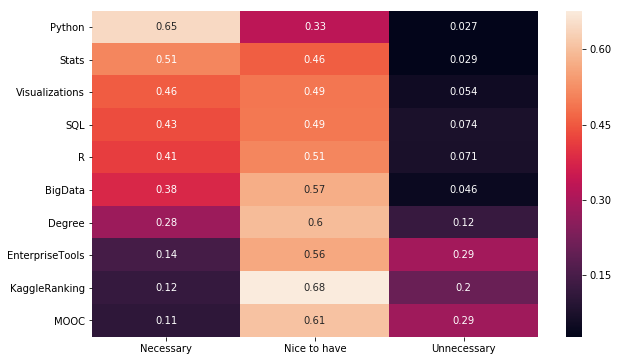

In [218]:
# 위의 데이터와 관련된 heatmap을 그려서 시각화해보자
plt.figure(figsize = (10, 6))
sns.heatmap(jdf.sort_values("Necessary", ascending = False), annot = True)


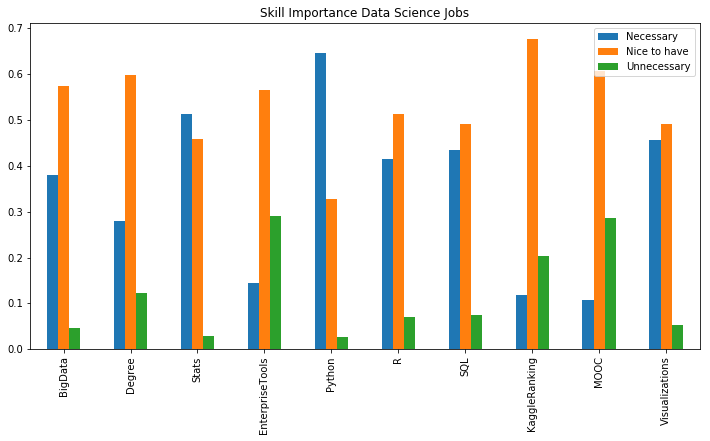

In [219]:
# 위에 그렸던 heatmap을 bar그래프로 나타내보자
jdf.plot(kind = 'bar', figsize = (12,6), title = "Skill Importance Data Science Jobs")

In [242]:
# Q8. 데이터 사이언티스트의 평균 급여는 얼마나 될까요?
# notnull인 데이터를 확인해보자, 보았더니 5224명이 응답을 해주었다.
mcq[mcq['CompensationAmount'].notnull()].shape

(5224, 228)

In [0]:
# 응답한 데이터 중 콤마나 하이픈이 들어가 있으므로 오류가 생기므로 replace를 써서 삭제시켜야 한다.
mcq['CompensationAmount'] = mcq['CompensationAmount'].str.replace(',', '')
mcq['CompensationAmount'] = mcq['CompensationAmount'].str.replace('-', '')

In [244]:
# 환율을 계산하기 위해서 정보 가져오기
rates = pd.read_csv('conversionRates.csv')
rates.head()

# pandas의 read로 읽어보았는데, Unnamed이가 있어서 drop을 써서 제거를 시켜주겠다.

,Unnamed: 0,originCountry,exchangeRate
0,1,USD,1.000000
1,2,EUR,1.195826
2,3,INR,0.015620
3,4,GBP,1.324188
4,5,BRL,0.321350


In [245]:
rates.drop('Unnamed: 0', axis = 1, inplace = True)
rates.head()

,originCountry,exchangeRate
0,USD,1.000000
1,EUR,1.195826
2,INR,0.015620
3,GBP,1.324188
4,BRL,0.321350


In [246]:
# salary에 mcq의 CompensationAmount, CompensationCurrency, GenderSelect, Country, CurrentJobTitleSelect을 담아서 살펴보기
salary = mcq[['CompensationAmount', 'CompensationCurrency', 'GenderSelect', 'Country', 'CurrentJobTitleSelect']].head()
salary

# 각 index안에 결측치들이 있다. 제거해주거나 fillna로 채워줘야 한다. 여기서는 제거해보자

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect
0,NaN,NaN,"Non-binary, genderqueer, or gender non-conforming",NaN,DBA/Database Engineer
1,NaN,NaN,Female,United States,NaN
2,NaN,NaN,Male,Canada,NaN
3,250000,USD,Male,United States,Operations Research Practitioner
4,NaN,NaN,Male,Taiwan,Computer Scientist


In [247]:
salary = mcq[['CompensationAmount','CompensationCurrency','GenderSelect', 'Country','CurrentJobTitleSelect']].dropna()
salary

# 결측치가 제거된 것을 볼 수 있다.

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect
3,250000,USD,Male,United States,Operations Research Practitioner
8,80000,AUD,Female,Australia,Business Analyst
9,1200000,RUB,Male,Russia,Software Developer/Software Engineer
11,95000,INR,Male,India,Data Scientist
14,1100000,TWD,Male,Taiwan,Software Developer/Software Engineer
21,20000,USD,Male,United States,Researcher
22,100000,USD,Male,United States,Scientist/Researcher
23,20000,CZK,Male,Czech Republic,Other
25,624000,RUB,Male,Russia,Data Analyst
27,156000000,COP,Male,Colombia,Data Scientist


In [254]:
# merge를 통해 rates와 salary를 합쳐보자
# Country를 살펴보았을 때, 나라는 각 각 달라서 그래프로 시각화하기 여렵다. 
# 그래서 공통화 하기 위해서 originCountry로 미국(USD) 환율을 기준으로 하기 위함. 명시하여라
salary = salary.merge(rates, left_on = 'CompensationCurrency', right_on = 'originCountry', how = 'left')

# CompensationAmount와 exchangeRate를 곱하여 값을 데이터 프레임에 저장하기, 환율로 계산된 값이다.
salary['Salary'] = pd.to_numeric(salary['CompensationAmount'])*salary['exchangeRate']
salary.head()

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry_x,exchangeRate_x,salary,originCountry_y,exchangeRate_y,originCountry,exchangeRate,Salary
0,250000,USD,Male,United States,Operations Research Practitioner,USD,1.000000,250000.0,USD,1.000000,USD,1.000000,250000.0
1,80000,AUD,Female,Australia,Business Analyst,AUD,0.802310,64184.8,AUD,0.802310,AUD,0.802310,64184.8
2,1200000,RUB,Male,Russia,Software Developer/Software Engineer,RUB,0.017402,20882.4,RUB,0.017402,RUB,0.017402,20882.4
3,95000,INR,Male,India,Data Scientist,INR,0.015620,1483.9,INR,0.015620,INR,0.015620,1483.9
4,1100000,TWD,Male,Taiwan,Software Developer/Software Engineer,TWD,0.033304,36634.4,TWD,0.033304,TWD,0.033304,36634.4


# Pandas(판다스)의 merge에 대한 관하여

*  참고 자료: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html
*   The join is done on columns or indexes. If joining columns on columns, the DataFrame indexes will be ignored. Otherwise if joining indexes on indexes or indexes on a column or columns, the index will be passed on.



In [255]:
# 위에서 만든 데이터를 바탕으로 Maximun, Minimum, Median을 출력해보자

print('Maximum Salary is USD $', salary['Salary'].dropna().astype(int).max())
print('Minimum Salary is USD $', salary['Salary'].dropna().astype(int).min())
print('Median Salary is USD $', salary['Salary'].dropna().astype(int).median())

# 가장 큰 수치는 여러 국가들의 GDP보다 크다고 한다. 가짜 응답이며, 평균급여는 USD $ 53,812 이다. 
# 그래프를 좀 더 잘 표현하기 위해 50만불 이상의 데이터만 distplot으로 그려봤다.

Maximum Salary is USD $ 28297400000
Minimum Salary is USD $ 0
Median Salary is USD $ 53812.0


Text(0.5, 1.0, 'Salary Distribution')

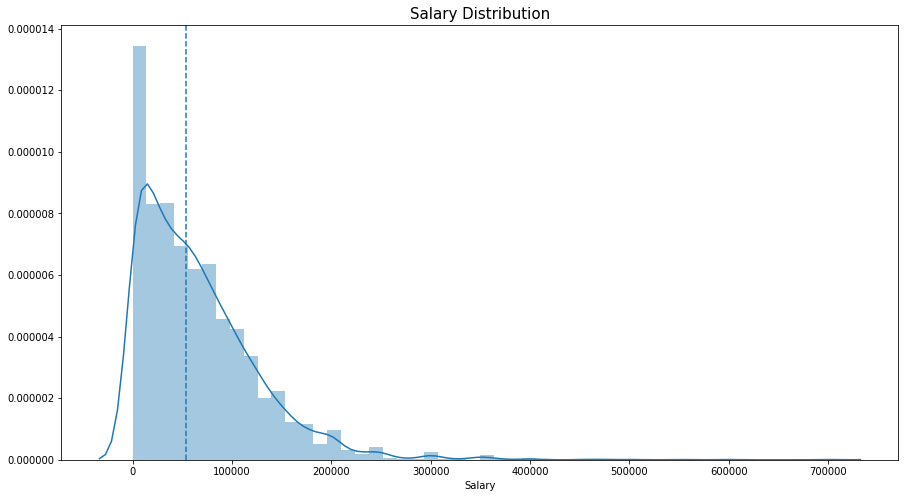

In [256]:
# 참고자료: https://matplotlib.org/api/index.html
plt.subplots(figsize = (15, 8))

# 100만불보다 작은 수치만 나타낼 것임
salary = salary[salary['Salary']<1000000]
sns.distplot(salary['Salary'])

# axvline을 원하는 곳에 중간값을 그려주었음
plt.axvline(salary['Salary'].median(), linestyle = 'dashed')
plt.title('Salary Distribution', size = 15)

# 100만불보다 작은수치만 그려보았는데, 0~100만불 사이가 가장 많고 점점 갈수록 작아진다.

Text(0.5, 1.0, 'Highest Salary Paying Countries')

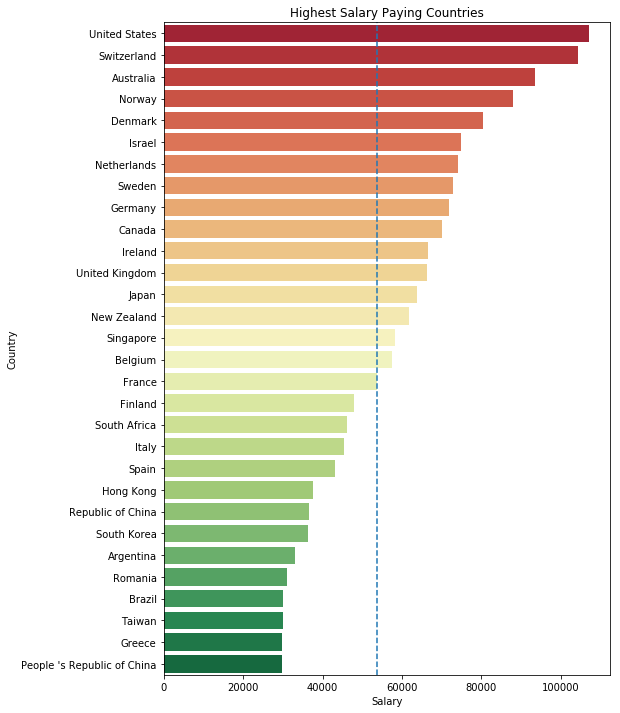

In [260]:
# 나라별 급여 높은 순으로 그려보기
plt.subplots(figsize = (8, 12))

sal_coun = salary.groupby('Country')['Salary'].median().sort_values(ascending = False)[:30].to_frame()

sns.barplot('Salary', sal_coun.index, data = sal_coun, palette = 'RdYlGn')
plt.axvline(salary['Salary'].median(), linestyle = 'dashed')
plt.title('Highest Salary Paying Countries')

# 미국, 스위스, 호주, 덴마크 순으로 되어 있고 약 23위 정도 된다.

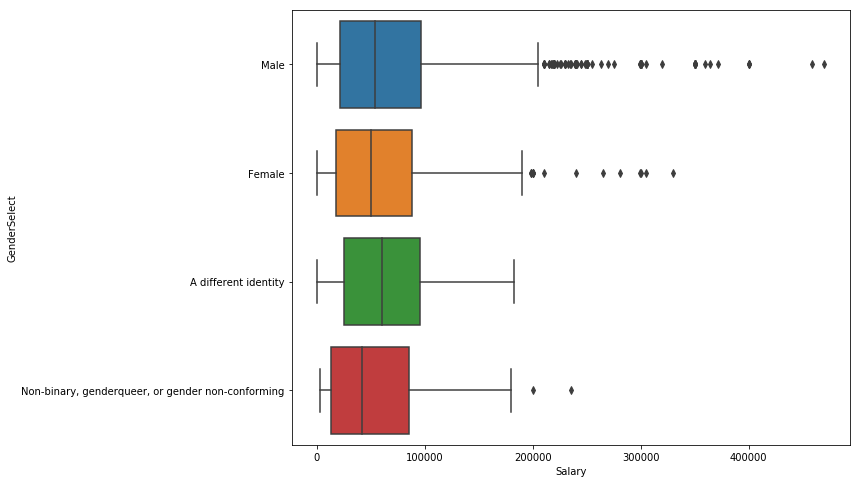

In [264]:
# 성별로 임금 격자가 어떻게 되는지 살펴보자, 이번에는 50만불보다 작게 살펴볼 것이다. 많은 격차는 없으나 남성들이 더 받는 것을 알 수 있다.
salary_5 = salary[salary['Salary']<500000]
plt.subplots(figsize = (10, 8))
sns.boxplot(y = 'GenderSelect', x = 'Salary', data = salary_5)

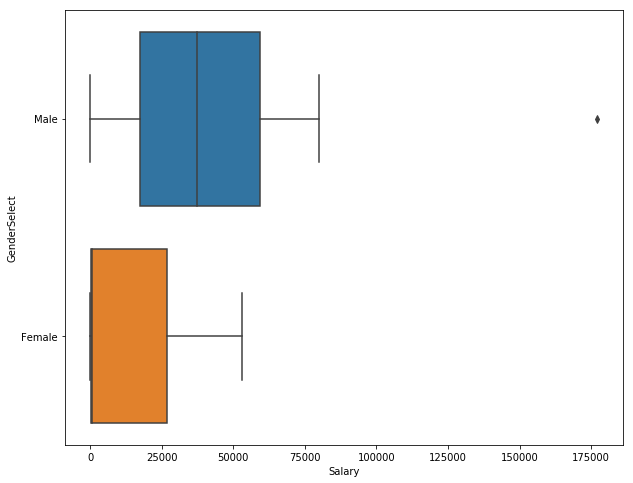

In [272]:
# 우리나라만 따로 가져와서 살펴보자
salary_korea = salary.loc[(salary['Country'] == 'South Korea')]

plt.subplots(figsize = (10, 8))
sns.boxplot(y = 'GenderSelect', x = 'Salary', data = salary_korea)

# 우리나라는 응답자수가 많지 않아서 남녀 격차가 굉장히 커보이고, 모수가 적어서 일반화하기가 어렵다.

In [273]:
salary_korea.shape

# 우리나라는 아래와 같이 26명 밖에 응답하지 않았다.

(26, 13)

In [274]:
salary_korea[salary_korea['GenderSelect'] == 'Female']

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry_x,exchangeRate_x,salary,originCountry_y,exchangeRate_y,originCountry,exchangeRate,Salary
479,30000,KRW,Female,South Korea,Data Analyst,KRW,0.000886,26.58,KRW,0.000886,KRW,0.000886,26.58
2903,800000,KRW,Female,South Korea,Researcher,KRW,0.000886,708.80,KRW,0.000886,KRW,0.000886,708.80
4063,60000000,KRW,Female,South Korea,Researcher,KRW,0.000886,53160.00,KRW,0.000886,KRW,0.000886,53160.00


In [276]:
# 한국 남성의 평균 급여는 어느 정도될까여?
salary_korea_male = salary_korea[salary_korea['GenderSelect'] == 'Male']
salary_korea_male['Salary'].describe()

# USD달러로 평균값이 434540달러이다. 23명의 남성이 응답해주었다.

count        23.000000
mean      43540.617217
std       37800.608484
min           0.886000
25%       17500.000000
50%       37212.000000
75%       59238.000000
max      177200.000000
Name: Salary, dtype: float64

In [277]:
salary_korea_male

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry_x,exchangeRate_x,salary,originCountry_y,exchangeRate_y,originCountry,exchangeRate,Salary
85,40000000,KRW,Male,South Korea,Business Analyst,KRW,0.000886,35440.000,KRW,0.000886,KRW,0.000886,35440.000
147,80000,USD,Male,South Korea,Researcher,USD,1.000000,80000.000,USD,1.000000,USD,1.000000,80000.000
314,60000,USD,Male,South Korea,Business Analyst,USD,1.000000,60000.000,USD,1.000000,USD,1.000000,60000.000
333,60000000,KRW,Male,South Korea,Researcher,KRW,0.000886,53160.000,KRW,0.000886,KRW,0.000886,53160.000
562,50000000,KRW,Male,South Korea,Researcher,KRW,0.000886,44300.000,KRW,0.000886,KRW,0.000886,44300.000
769,42000000,KRW,Male,South Korea,Software Developer/Software Engineer,KRW,0.000886,37212.000,KRW,0.000886,KRW,0.000886,37212.000
799,1000,KRW,Male,South Korea,Machine Learning Engineer,KRW,0.000886,0.886,KRW,0.000886,KRW,0.000886,0.886
1060,75000000,KRW,Male,South Korea,Scientist/Researcher,KRW,0.000886,66450.000,KRW,0.000886,KRW,0.000886,66450.000
1360,30000000,KRW,Male,South Korea,Statistician,KRW,0.000886,26580.000,KRW,0.000886,KRW,0.000886,26580.000
1568,90000,SGD,Male,South Korea,Computer Scientist,SGD,0.742589,66833.010,SGD,0.742589,SGD,0.742589,66833.010


In [279]:
# Q9. 개인프로젝트나 학습용 데이터를 주로 어디에서 얻을까요?
mcq['PublicDatasetsSelect'] = mcq['PublicDatasetsSelect'].astype('str').apply(lambda x: x.split(','))
q = mcq.apply(lambda x: pd.Series(x['PublicDatasetsSelect']), axis = 1).stack().reset_index(level = 1, drop = True)

q.name = 'Courses'

data_cs = q[q != 'nan'].value_counts()
pd.DataFrame(data_cs)

# aggregator, google search 등 순으로 보여주었다.

,Courses
Dataset aggregator/platform (i.e. Socrata/Kaggle Datasets/data.world/etc.),6843
Google Search,3600
University/Non-profit research group websites,2873
I collect my own data (e.g. web-scraping),2560
GitHub,2400
Government website,2079
Other,399


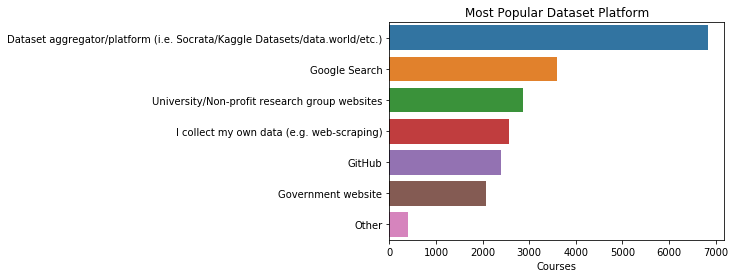

In [282]:
# 그래프를 그려보기
plt.title('Most Popular Dataset Platform')
sns.barplot(y = data_cs.index, x = data_cs)

# kaggle 및 socrata는 개인 프로젝트나 학습에 사용하기 위한 데이터를 얻는데 가장 인기있는 플랫폼이다. 구글 검색 및 대학/비영리 단체 웹 사이트는 각각 2,3위를 차지하였다.
# 그

In [283]:
# 주관식 응답에 관한 데이터를 불러오면 다음과 같다.
fr = pd.read_csv('freeformResponses.csv')
fr.shape

# encoding="ISO-8859-1", low_memory=False 지정에 관한 자료 참고하기
# 응답자가 16716명 이였다.

(16716, 62)

In [285]:
# 설문내용과 누구에게 물어봤는지 찾아보았음
qc_fr = question.loc[question['Column'].str.contains('PersonalProjectsChallengeFreeForm')]

print(qc_fr.shape)
qc_fr.Question.values[0]

(1, 3)


'What is your biggest challenge with the public datasets you find for personal projects?'

In [286]:
# 개인프로젝트에서 공개된 데이터셋을 다루는데 가장 어려운 점은 무엇일까?
ppcff = fr['PersonalProjectsChallengeFreeForm'].value_counts().head(15)
ppcff.name = '응답 수'
pd.DataFrame(ppcff)
# 대부분 데이터를 정제하는 일(cleaning the data)이라고 응답하였고, 그 다음이 데이터 크기(size)이다.

,응답 수
None,23
Cleaning the data,20
Cleaning,20
Dirty data,16
Data Cleaning,14
none,13
dirty data,10
Data cleaning,10
-,9
Size,9


In [294]:
# Q11. 데이터 사이언스 업무에서 가장 많은 시간을 필요로 하는 일은?
# tume_features에 담아주기
time_features = [x for x in mcq.columns if x.find('Time') != -1][4:10]
time_features

['TimeGatheringData',
 'TimeModelBuilding',
 'TimeProduction',
 'TimeVisualizing',
 'TimeFindingInsights',
 'TimeOtherSelect']

In [300]:
# for뒤에 feature로 입력해야지 features로 입력하면 unsupported operand type(s) for +: 'int' and 'str' 이런 오류 발생한다.
tdf = {}
for feature in time_features:
  tdf[feature[len('Time'):]] = mcq[feature].mean()
  
tdf = pd.Series(tdf)
print(tdf)

GatheringData      36.144754
ModelBuilding      21.268066
Production         10.806372
Visualizing        13.869372
FindingInsights    13.094776
OtherSelect         2.396247
dtype: float64


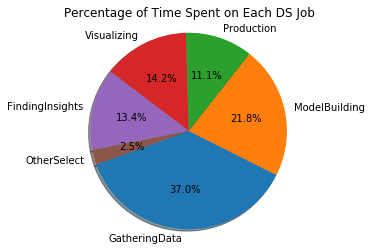

In [307]:
# 파이차트로 그려보자.
plt.pie(tdf, labels = tdf.index, autopct = '%1.1f%%', shadow = True, startangle = 200)
plt.axis('equal')
plt.title("Percentage of Time Spent on Each DS Job")
plt.show()

# GatherData(데이터 수집)이 37%로 가장 많고, ModelBuilding(모델생성) 21%, Viualizing(시각화), FindingInsights(인사이트 찾기) 등 순으로 볼 수 있다.

In [308]:
# Q12. 데이터 사이언스 직업을 찾는데 가장 고려해야 할 요소는 무엇인가?
# 질문내용과 누구에게 물어봤는지 살펴보자
qc_jf = question.loc[question['Column'].str.contains('JobFactor')]

print(qc_jf.shape)
qc_jf.Question.values

(16, 3)


array(['How are you assessing potential job opportunities? - Opportunities for professional development',
       'How are you assessing potential job opportunities? - The compensation and benefits offered',
       "How are you assessing potential job opportunities? - The office environment I'd be working in",
       "How are you assessing potential job opportunities? - The languages, frameworks, and other technologies I'd be working with",
       "How are you assessing potential job opportunities? - The amount of time I'd have to spend commuting",
       'How are you assessing potential job opportunities? - How projects are managed at the company or organization',
       'How are you assessing potential job opportunities? - The experience level called for in the job description',
       "How are you assessing potential job opportunities? - The specific department or team I'd be working on",
       "How are you assessing potential job opportunities? - The specific role or job title I'd 

In [310]:
job_factors = [x for x in mcq.columns if x.find('JobFactor') !=-1]
job_factors

# JobFactor와 관련된 index 찾아보기

['JobFactorLearning',
 'JobFactorSalary',
 'JobFactorOffice',
 'JobFactorLanguages',
 'JobFactorCommute',
 'JobFactorManagement',
 'JobFactorExperienceLevel',
 'JobFactorDepartment',
 'JobFactorTitle',
 'JobFactorCompanyFunding',
 'JobFactorImpact',
 'JobFactorRemote',
 'JobFactorIndustry',
 'JobFactorLeaderReputation',
 'JobFactorDiversity',
 'JobFactorPublishingOpportunity']

In [312]:
# 위에 설문조사한 내용을 바탕으로 데이터프레임으로 만들기,
jfdf = {}

for feature in job_factors:
  a = mcq[feature].value_counts()
  a = a/a.sum()
  jfdf[feature[len('JobFactor'):]] = a

jfdf = pd.DataFrame(jfdf)
jfdf

# 상관관계 값을 다음과 같이 데이터프레임으로 만들어주었다. 문제는 x축과 y축을 바꿔줘야 한다.

,Learning,Salary,Office,Languages,Commute,Management,ExperienceLevel,Department,Title,CompanyFunding,Impact,Remote,Industry,LeaderReputation,Diversity,PublishingOpportunity
Not important,0.024500,0.049928,0.060554,0.071367,0.132289,0.089983,0.092232,0.165105,0.149971,0.149809,0.115793,0.278914,0.180698,0.209350,0.249853,0.205315
Somewhat important,0.252323,0.488953,0.405998,0.443165,0.522193,0.466511,0.494908,0.482728,0.444640,0.562298,0.490866,0.440713,0.505720,0.520141,0.487390,0.438960
Very Important,0.723177,0.461119,0.533449,0.485468,0.345518,0.443506,0.412860,0.352166,0.405390,0.287892,0.393341,0.280374,0.313582,0.270509,0.262757,0.355724


In [313]:
# 바꿔주기 위해서 transpose를 사용한다
jfdf = pd.DataFrame(jfdf).transpose()
jfdf

# Not important, Somewhat important, Very Important로 보여줄 수 있겠다.

,Not important,Somewhat important,Very Important
Learning,0.024500,0.252323,0.723177
Salary,0.049928,0.488953,0.461119
Office,0.060554,0.405998,0.533449
Languages,0.071367,0.443165,0.485468
Commute,0.132289,0.522193,0.345518
Management,0.089983,0.466511,0.443506
ExperienceLevel,0.092232,0.494908,0.412860
Department,0.165105,0.482728,0.352166
Title,0.149971,0.444640,0.405390
CompanyFunding,0.149809,0.562298,0.287892


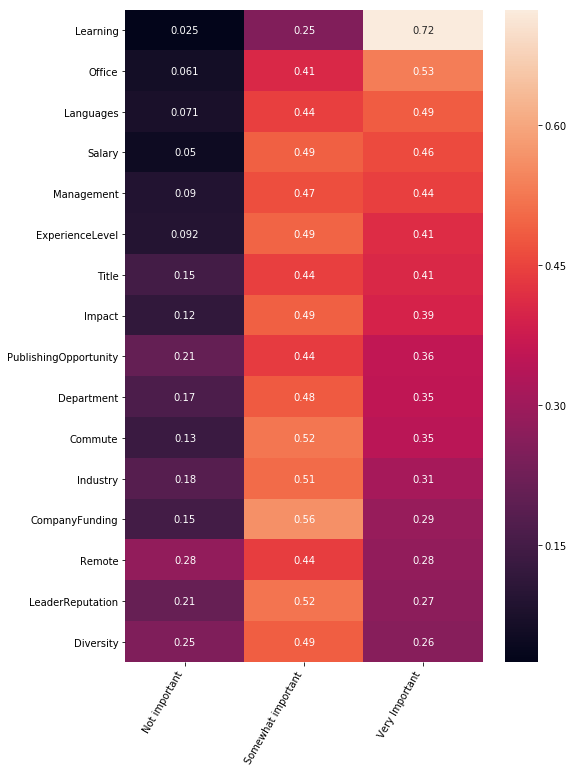

In [316]:
# 위의 데이터프레임을 히트맵으로 시각화 해보자.
plt.figure(figsize=(8,12))
plt.xticks(rotation=60, ha='right')

# sort_values는 해당과 가장 연관성 있는(상관관계가 높은값 = 1에 가까운) 순으로 나열한다.
sns.heatmap(jfdf.sort_values('Very Important', ascending=False), annot=True)

# very important에서 learning이 가장 중요하고, office, Languages등 순으로 보여지고, Not important에서는 remote, diversity는 중요하지 않다고 한다.

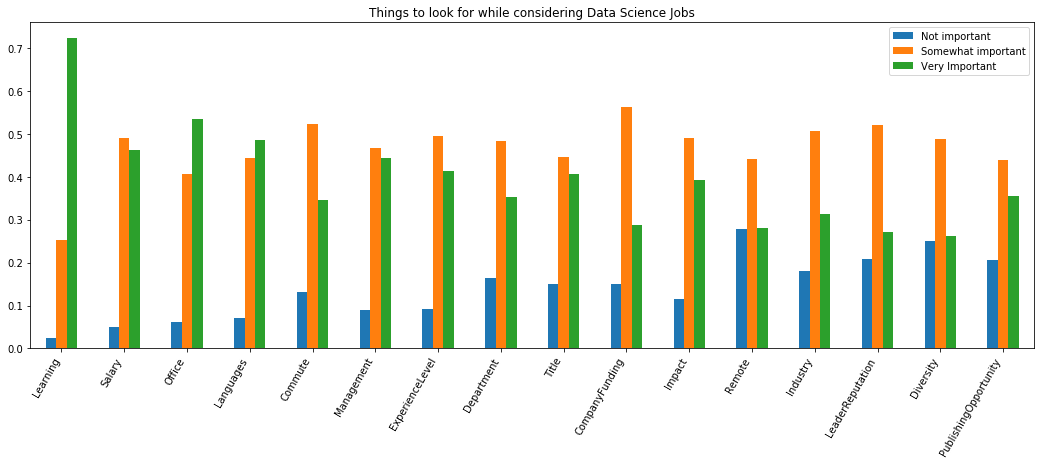

In [317]:
# bar차트로 한번 살펴보자
jfdf.plot(kind='bar', figsize=(18,6), title="Things to look for while considering Data Science Jobs")
plt.xticks(rotation=60, ha='right')
plt.show()

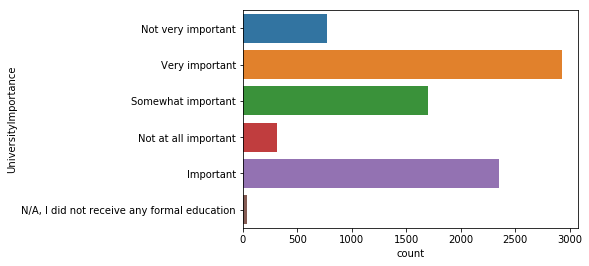

In [318]:
# Q13. 데이터 사이언티스트가 되기 위해서 학위가 중요할까요?
sns.countplot(y = 'UniversityImportance', data = mcq)

# very important가 가장 많았고 그 다음 important가, 그 다음 not very important이다.

In [326]:
# 이 그래프를 연령대별로 다시 한번 살펴보자
# plotly라는 시각화 툴을 사용해보자

import plotly.offline as py

py.init_notebook_mode(connected=True)

import plotly.figure_factory as fig_fact

# UniversityImportance의 value_counts를 상위 5개만 가져오기 top_uni에 담아줍시다.
top_uni = mcq['UniversityImportance'].value_counts().head(5)

# top_uni_dist를 리스트화 할껀데여, for 구문을 이용하여 
top_uni_dist = []
for uni in top_uni.index:
    top_uni_dist.append(mcq[(mcq['Age'].notnull()) & \
                            (mcq['UniversityImportance'] == uni)]['Age'])

# group_labels를 top_uni의 index로 집어넣자
group_labels = top_uni.index


# Plotly와 관련된 내용

https://github.com/plotly

In [330]:
# distplot으로 시각화하기
fig = fig_fact.create_distplot(top_uni_dist, group_labels, show_hist=False)

py.iplot(fig, filename='University Importance by Age')


In [328]:
!pip install plotly --upgrade

     |████████████████████████████████| 7.1MB 2.8MB/s 
  Found existing installation: plotly 3.6.1
    Uninstalling plotly-3.6.1:
      Successfully uninstalled plotly-3.6.1


In [331]:
# Q14. 어디서부터 데이터사이언스를 시작해야 할까요?
# 응답자수는 14712명이였다.
mcq[mcq['FirstTrainingSelect'].notnull()].shape

(14712, 228)

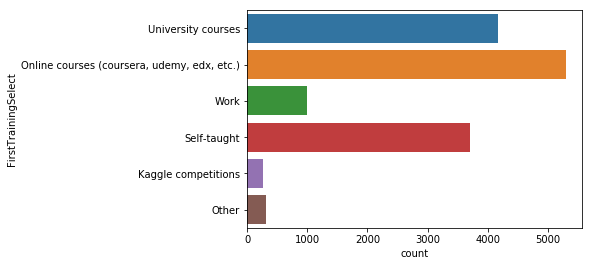

In [332]:
# 그래프를 그려보았다, online courses가 제일 많고, university courses, self-taught 등 순으로 볼 수 있다.
sns.countplot(y='FirstTrainingSelect', data=mcq)

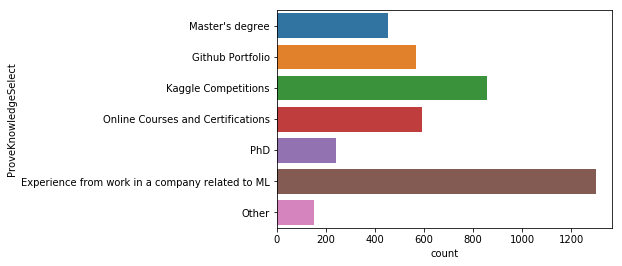

In [333]:
# Q15. 데이터 사이언티스트 이력서에서 가장 중요한 것은 무엇일까요?
sns.countplot(y='ProveKnowledgeSelect', data=mcq)

# 머신러닝과 관련 된 직무경험이 가장 중요하고 다음으로 캐글 경진대회의 결과가 중요하다고 답했다. 
# 그리고 온라인 강좌의 수료증이나 깃헙 포트폴리오 순으로 중요하다고 답했다.

In [335]:
# Q16. 머신러닝 알고리즘을 사용하기 위햐 수학 공부가 필요할까요?
# scikit과 같은 라이브러리는 세부 정보를 추상화하여 기본기술을 몰라도 ML모델을 만들 수 있다.
# 수학적 지식은 데이터사이언스에 필요한 부분은 일부분 밖에 되지 않고 어려운 지식을 요구하지 않는다. 따라서 그에 필요한 핵심부분만 공부하면 된다.
# 설문내용과 누구에게 물어봤는지를 찾아보자
qc_aul = question.loc[question['Column'].str.contains('AlgorithmUnderstandingLevel')]
qc_aul

,Column,Question,Asked
227,AlgorithmUnderstandingLevel,At which level do you understand the mathemati...,CodingWorker


In [338]:
# 7410명의 응답자
mcq[mcq['AlgorithmUnderstandingLevel'].notnull()].shape


(7410, 228)

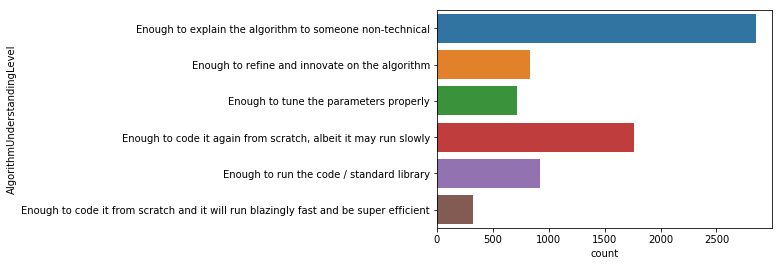

In [339]:
# 그래프를 그려보면, 
sns.countplot(y='AlgorithmUnderstandingLevel', data=mcq)

# 현재 코딩업무를 하는 사람들에게 질문했으며, 기술과 관련 없는 사람에게 설명할 수 있는 정도라면 충분하다는 응답이 가장 많으며 
# 좀 더디더라도 밑바닥부터 다시 코딩해 볼 수 있는 게 중요하다는 응답이 그 뒤를 잇는다.

In [341]:
# Q17. 어디에서 일을 찾아야 할까요?
# 설문내용과 누구에게 물어봤는지를 찾아보자
qc_jsr = question.loc[question['Column'].str.contains('JobSearchResource|EmployerSearchMethod')]
qc_jsr

,Column,Question,Asked
108,EmployerSearchMethod,How did you find your current job? - Selected ...,CodingWorker-NC
109,EmployerSearchMethodOtherFreeForm,How did you find your current job? - Some othe...,CodingWorker-NC
271,JobSearchResource,Which resource has been the best for finding d...,Learners
272,JobSearchResourceFreeForm,Which resource has been the best for finding d...,Learners


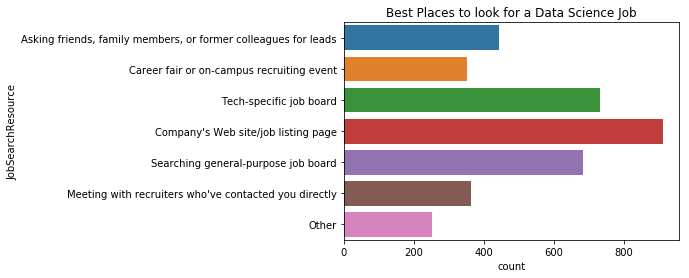

In [342]:
# 그래프를 그려보면,
plt.title("Best Places to look for a Data Science Job")
sns.countplot(y='JobSearchResource', data=mcq)

# 구직자들은 회사 웹사이트나 구직 사이트로부터 찾고 
# 그 다음으로 특정 기술의 채용 게시판, 일반 채용 게시판, 친구나 가족, 이전 직장 동료나 리더를 통해 채용 정보를 얻는다.

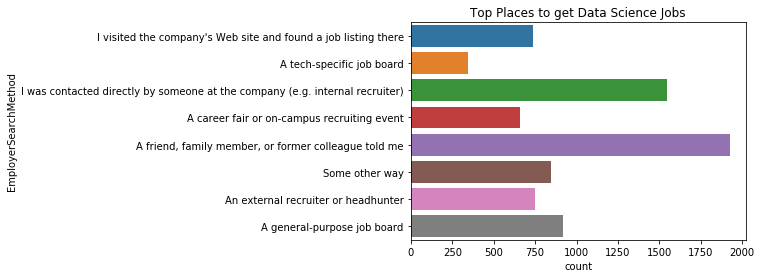

In [343]:
# EmploySearchMethod에 관한 그래프를 그려보자
plt.title("Top Places to get Data Science Jobs")
sns.countplot(y='EmployerSearchMethod', data=mcq)

# 구직자는 주로 구직사이트로 부터 채용정보를 가장 많이 찾았으나, 채용자는 친구, 가족, 이전 직장 동료 등의 추천을 통해 가장 많이 사람을 구하며 
# 다음으로 리쿠르터나 특정 회사에 소속 된 사람에게 직접 연락을 해서 구하는 비율이 높다.

# 한국사람들의 데이터사이언스 직업 구하는 매체


*   데이터 사이언스의 직업을 찾기위해 회사의 웹사이트나 게시판을 통해 대부분 찾는다.
*   마찬가지로 채용하는 사람들도 친구 지인, 가족, 학교 후배 등 


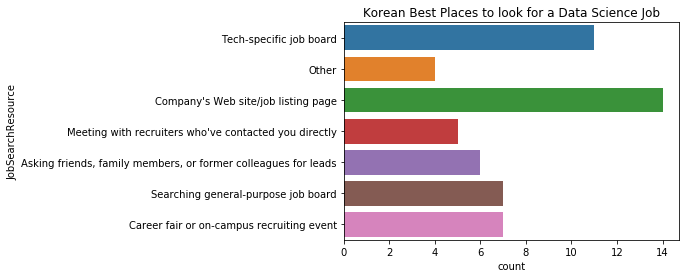

In [345]:
# 그렇다면 한국 사람들은 어떨까요?
plt.title("Korean Best Places to look for a Data Science Job")
sns.countplot(y='JobSearchResource', data=korea_ex)

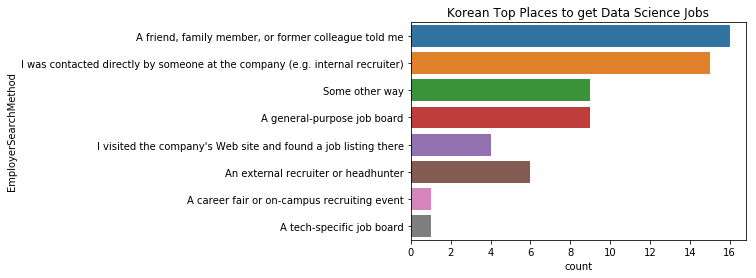

In [346]:
plt.title("Korean Top Places to get Data Science Jobs")
sns.countplot(y='EmployerSearchMethod', data=korea_ex)

# 결론


*   그래프를 그리기 위한 사용한 모듈을 알아보았음
*   데이터를 정제하고 프레임을 만들기 위한 방법을 살펴보았음
*   음...
*   항목 추가

